# Regression and Other Stories: Earnings

Bootstrapping to simulate the sampling distribution. See Chapter 5 in Regression and Other Stories.

---

### Load packages

In [1]:
using DataFrames, StatsPlots, CSV, HTTP, StatsBase
using Distributions, Turing, MCMCChains, CategoricalArrays

### Load data

In [2]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv"
earnings  = CSV.File(HTTP.get(data).body, delim=",", missingstring="NA") |> DataFrame
first(earnings , 6)

,height,weight,male,earn,earnk,ethnicity,education,mother_education
,Int64,Int64?,Int64,Float64,Float64,String,Int64?,Int64?
1,74,210,1,50000.0,50.0,White,16,16
2,66,125,0,60000.0,60.0,White,16,16
3,64,126,0,30000.0,30.0,White,16,16
4,65,200,0,25000.0,25.0,White,17,17
5,63,110,0,50000.0,50.0,Other,16,16
6,68,165,0,62000.0,62.0,Black,18,18


### Median of women's earnings, divided by the median of men's earnings

In [3]:
earn = earnings.earn
male = earnings.male

print(median(earn[male.==0]) / median(earn[male.==1]))

0.6

### A single bootstrap sample

In [4]:
n = nrow(earnings)
boot = sample( 1:n, n, replace=true)
earn_boot = earn[boot] # n.b. replacement is true by default, included for clarity
male_boot = male[boot]
ratio_boot = median(earn_boot[male_boot.==0]) / median(earn_boot[male_boot.==1]);

### A set of bootstrap simulations

In [5]:
function boot_ratio(data)
    n = nrow(data)
    boot = sample( 1:n, n, replace=true)
    earn_boot = earn[boot] # n.b. replacement is true by default, included for clarity
    male_boot = male[boot]
    ratio_boot = median(earn_boot[male_boot.==0]) / median(earn_boot[male_boot.==1])
end
n_sims = 10000

output = zeros(n_sims)
for i in 1:n_sims
    output[i] = boot_ratio(earnings)
end

### Summarize the results graphically and numerically

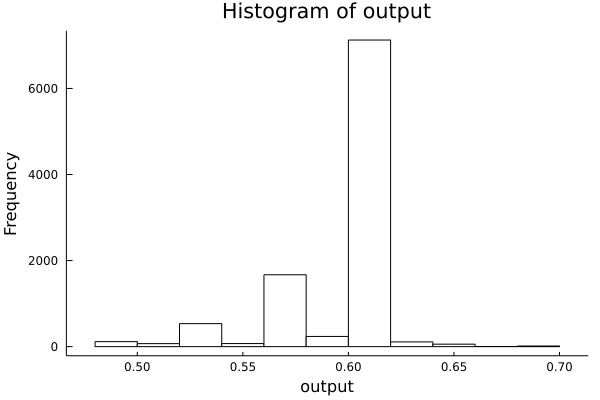

In [6]:
histogram(
    output,
    grid=false,
    xlabel="output",
    ylabel="Frequency",
    title="Histogram of output",
    legend=false,
    fillcolor="white",
    bins=15
    )

In [7]:
round(std(output), digits=2)

0.03